In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
pos_cash = pd.read_csv('POS_CASH_balance.csv')
previous_train = pd.read_csv('previous_train.csv')
previous_test = pd.read_csv('previous_test.csv')

In [54]:
pos_cash.shape, previous_train.shape, previous_test.shape

((10001358, 8), (70452, 46), (30160, 46))

In [55]:
pos_cash.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [56]:
previous_train.head()

,SK_ID_CURR,TARGET,CODE_GENDER,AMT_INCOME_TOTAL,AMT_ANNUITY_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,...,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
0,184029,0,F,337500.0,47313.0,Working,Higher education,0.010147,-20469,-5102.0,...,Regional / Local,149.000000,Consumer electronics,12.000000,middle,POS household with interest,-2101.0,-1771.0,-1801.0,-1793.0
1,334424,0,F,135000.0,12681.0,Pensioner,Secondary / secondary special,0.006305,-21927,-632.0,...,Country-wide,119.000000,Consumer electronics,12.000000,low_normal,POS household with interest,-434.0,-104.0,-104.0,-96.0
2,432407,0,F,225000.0,47569.5,State servant,Secondary / secondary special,0.032561,-14389,-2470.0,...,Credit and cash offices,226.800000,XNA,24.800000,high,Cash Street: high,-1473.5,-843.5,90312.0,90315.0
3,259337,0,F,139500.0,20214.0,Working,Secondary / secondary special,0.030755,-17047,-3103.0,...,Country-wide,1023.142857,Consumer electronics,15.333333,other,POS household with interest,-880.5,13500.0,90874.0,90876.5
4,279599,0,M,157500.0,38686.5,Working,Secondary / secondary special,0.015221,-13100,-3846.0,...,Stone,20.000000,Construction,12.000000,middle,POS industry with interest,-538.0,-208.0,-268.0,-266.0


In [57]:
previous_test.head()

,SK_ID_CURR,TARGET,CODE_GENDER,AMT_INCOME_TOTAL,AMT_ANNUITY_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,...,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
0,384575,0,M,207000.0,52641.0,Commercial associate,Secondary / secondary special,0.009630,-13297,-637.0,...,Credit and cash offices,650.600000,XNA,5.600000,other,Card Street,-2104.5,-1804.5,-1804.5,-1796.00
1,233043,0,F,130500.0,34443.0,Pensioner,Secondary / secondary special,0.022800,-23516,-1663.0,...,Credit and cash offices,35.545455,XNA,12.833333,other,Cash,-1530.6,-1170.6,-1218.6,-1212.80
2,134561,1,F,67500.0,17077.5,Commercial associate,Secondary / secondary special,0.006305,-13280,-3471.0,...,Regional / Local,145.333333,Consumer electronics,9.333333,high,POS household with interest,-774.5,-534.5,-684.5,-677.50
3,188909,0,F,270000.0,17122.5,Pensioner,Secondary / secondary special,0.005144,-22532,-10231.0,...,Credit and cash offices,13.200000,XNA,19.000000,low_normal,Card X-Sell,-736.0,13500.0,182422.5,182425.75
4,347275,0,M,427500.0,36292.5,Commercial associate,Secondary / secondary special,0.014520,-16758,-80.0,...,Country-wide,2300.000000,Consumer electronics,15.000000,low_action,POS household with interest,-687.0,3.0,-147.0,-145.00


# Dados Duplicados

In [58]:
# Algumas variaveis ja tinham no dataframe original
pos_cash.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [59]:
previous_train.columns

Index(['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'AMT_INCOME_TOTAL',
       'AMT_ANNUITY_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_3', 'EXT_SOURCE_MEAN',
       'CREDIT_ACTIVE', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE',
       'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_SUM',
       'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'DAYS_CREDIT_UPDATE',
       'SK_ID_PREV', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY_y', 'AMT_APPLICATION',
       'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y', 'HOUR_APPR_PROCESS_START',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'CODE_REJECT_REASON',
       'NAME_GOODS_CATEGORY', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 

In [60]:
pos_cash.duplicated().sum()

0

In [61]:
pos_cash.SK_ID_PREV.duplicated().sum()

9065033

In [62]:
pos_cash.SK_ID_CURR.duplicated().sum()

9664106

In [63]:
pos_cash.SK_ID_CURR.value_counts()

SK_ID_CURR
265042    295
172612    247
309133    246
127659    245
185185    245
         ... 
406557      1
240277      1
177557      1
251697      1
144536      1
Name: count, Length: 337252, dtype: int64

In [64]:
# As variaveis que possuem variações em suas descrições mostram informações adicionais para cada cliente
pos_cash[pos_cash['SK_ID_CURR'] == 265042].describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,2.950000e+02,295.0,295.000000,295.000000,295.000000,295.0,295.0
mean,1.858736e+06,265042.0,-48.589831,19.111864,10.115254,0.0,0.0
std,5.214935e+05,0.0,26.034473,8.782192,7.864084,0.0,0.0
min,1.130567e+06,265042.0,-96.000000,3.000000,0.000000,0.0,0.0
25%,1.295333e+06,265042.0,-71.000000,12.000000,4.000000,0.0,0.0
50%,1.776290e+06,265042.0,-50.000000,18.000000,9.000000,0.0,0.0
75%,2.372251e+06,265042.0,-24.000000,24.000000,14.000000,0.0,0.0
max,2.605449e+06,265042.0,-2.000000,36.000000,36.000000,0.0,0.0


In [65]:
pos_cash[pos_cash['SK_ID_CURR'] == 172612].describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,2.470000e+02,247.0,247.000000,247.000000,247.000000,247.000000,247.000000
mean,2.014532e+06,172612.0,-56.635628,19.214575,10.251012,0.044534,0.044534
std,4.820220e+05,0.0,26.062714,8.252033,7.674379,0.699913,0.699913
min,1.012864e+06,172612.0,-96.000000,5.000000,0.000000,0.000000,0.000000
25%,1.614497e+06,172612.0,-79.000000,12.000000,4.000000,0.000000,0.000000
50%,2.123534e+06,172612.0,-60.000000,18.000000,9.000000,0.000000,0.000000
75%,2.344813e+06,172612.0,-38.000000,24.000000,15.000000,0.000000,0.000000
max,2.777393e+06,172612.0,-1.000000,36.000000,36.000000,11.000000,11.000000


In [66]:
print(pos_cash.dtypes)

SK_ID_PREV                 int64
SK_ID_CURR                 int64
MONTHS_BALANCE             int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS      object
SK_DPD                     int64
SK_DPD_DEF                 int64
dtype: object


In [67]:
pos_cash.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [68]:
# Vou agrupar os valores da média de cada cliente para cada variavel
# Assim terá uma representação do histórico de cada cliente
# Função para calcular a moda
def mode_func(x):
    return x.mode().iloc[0] if not x.empty else None

# Definindo o dicionário com as funções de agregação por coluna
agg_dict = {
    'SK_ID_PREV': 'first',  
    'MONTHS_BALANCE': 'min',
    'CNT_INSTALMENT': 'mean',
    'CNT_INSTALMENT_FUTURE': 'mean',
    'NAME_CONTRACT_STATUS': mode_func,
    'SK_DPD': 'mean',
    'SK_DPD_DEF': 'mean'
}

# Aplicando a agregação por grupo (SK_ID_CURR)
pos_cash_agg = pos_cash.groupby('SK_ID_CURR').agg(agg_dict).reset_index()

In [69]:
pos_cash_agg.shape

(337252, 8)

In [70]:
pos_cash_agg.head()

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,100001,1851984,-96,4.000000,1.444444,Active,0.777778,0.777778
1,100002,1038818,-19,24.000000,15.000000,Active,0.000000,0.000000
2,100003,2396755,-77,10.107143,5.785714,Active,0.000000,0.000000
3,100004,1564014,-27,3.750000,2.250000,Active,0.000000,0.000000
4,100005,2495675,-25,11.700000,7.200000,Active,0.000000,0.000000


In [71]:
pos_cash.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03


In [72]:
pos_cash_agg.describe()

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,337252.000000,3.372520e+05,337252.000000,337224.000000,337224.000000,337252.000000,337252.000000
mean,278163.132678,1.902943e+06,-52.874349,14.654990,9.176876,4.296271,0.225470
std,102877.889290,5.353169e+05,29.690356,7.969848,6.501034,59.717229,13.554576
min,100001.000000,1.000001e+06,-96.000000,1.000000,0.000000,0.000000,0.000000
25%,189046.750000,1.435096e+06,-82.000000,9.625000,5.000000,0.000000,0.000000
50%,278241.500000,1.895909e+06,-51.000000,12.000000,6.989411,0.000000,0.000000
75%,367320.250000,2.368511e+06,-25.000000,18.600000,11.666667,0.000000,0.000000
max,456255.000000,2.843492e+06,-1.000000,72.000000,60.000000,2622.078431,1740.554455


- Valores Médios: As médias de MONTHS_BALANCE, CNT_INSTALMENT, e outros indicadores mostraram mudanças que indicam um comportamento mais consolidado dos clientes. A média de dias em atraso (SK_DPD) e inadimplência (SK_DPD_DEF) diminuiu, refletindo uma melhora no perfil de crédito médio.
- Intervalos: Os limites mínimo e máximo para algumas colunas mudaram, o que é esperado após o agrupamento.

Interpretação Geral

- Os dados agrupados fornecem uma visão mais clara do comportamento médio dos clientes em relação a pagamentos e inadimplência, reduzindo o ruído dos dados individuais. Essa abordagem é útil para modelagem preditiva e análise de risco, permitindo identificar tendências gerais e perfis de risco mais consistentes.

# Merge / Treino - Teste

In [73]:
# Separando o conjunto de dados bureau_balance entre treino e teste
pos_train, pos_test = train_test_split(pos_cash_agg, test_size=0.30, random_state=42)

# Exibindo o tamanho dos conjuntos de treino e teste
# Vou deixar a mesma quantidade de teste do bureau_test
print(f"Tamanho do conjunto de treino (pos_train): {pos_train.shape}")
print(f"Tamanho do conjunto de teste (pos_test): {pos_test.shape}")

Tamanho do conjunto de treino (pos_train): (236076, 8)
Tamanho do conjunto de teste (pos_test): (101176, 8)


## Merge

In [75]:
df_pos_train = pd.merge(previous_train,pos_train , on='SK_ID_CURR', how='left')
df_pos_test = pd.merge(previous_test, pos_test, on='SK_ID_CURR', how='left')

df_pos_train.shape, df_pos_test.shape 

((70452, 53), (30160, 53))

# Tratamento de Dados

## Nulos

In [76]:
df_pos_train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
CODE_GENDER                       0
AMT_INCOME_TOTAL                  0
AMT_ANNUITY_x                     0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_EMP_PHONE                    0
REG_CITY_NOT_WORK_CITY            0
ORGANIZATION_TYPE                 0
FLAG_DOCUMENT_3                   0
EXT_SOURCE_MEAN                   0
CREDIT_ACTIVE                     0
DAYS_CREDIT                       0
CREDIT_DAY_OVERDUE                0
DAYS_CREDIT_ENDDATE               0
DAYS_ENDDATE_FACT                 0
AMT_CREDIT_SUM                    0
AMT_CREDIT_SUM_DEBT               0
AMT_CREDIT_SUM_LIMIT              0
DAYS_CREDIT_UPDATE                0
SK_ID_PREV_x                      0
NAME_CONTRACT_TYPE                0
AMT_ANNUITY_y               

In [77]:
# Excluindo variaveis ID 
df_pos_train = df_pos_train.drop(['SK_ID_PREV_y'], axis=1)
df_pos_test = df_pos_test.drop(['SK_ID_PREV_y'], axis=1)

df_pos_train.shape, df_pos_test.shape

((70452, 52), (30160, 52))

In [78]:
df_pos_train.NAME_CONTRACT_STATUS_y.value_counts()

NAME_CONTRACT_STATUS_y
Active                   48911
Completed                   77
Signed                      18
Demand                       6
Amortized debt               2
Returned to the store        1
Name: count, dtype: int64

In [79]:
# Substituindo valores nulos por 'Other'
df_pos_train['NAME_CONTRACT_STATUS_y'] = df_pos_train['NAME_CONTRACT_STATUS_y'].fillna('Other')
df_pos_test['NAME_CONTRACT_STATUS_y'] = df_pos_test['NAME_CONTRACT_STATUS_y'].fillna('Other')

df_pos_train.NAME_CONTRACT_STATUS_y.value_counts()

NAME_CONTRACT_STATUS_y
Active                   48911
Other                    21437
Completed                   77
Signed                      18
Demand                       6
Amortized debt               2
Returned to the store        1
Name: count, dtype: int64

In [80]:
df_pos_train[['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF' ]].describe()

,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,49015.000000,49011.000000,49011.000000,49015.000000,49015.000000
mean,-55.318352,14.826810,9.360786,4.009236,0.193658
std,29.078851,8.086569,6.643483,54.029427,12.254011
min,-96.000000,1.000000,0.000000,0.000000,0.000000
25%,-83.000000,9.619048,5.000000,0.000000,0.000000
50%,-56.000000,12.000000,7.025000,0.000000,0.000000
75%,-28.000000,18.939846,11.919184,0.000000,0.000000
max,-1.000000,66.064103,59.500000,2346.603774,1567.542373


In [81]:
# Substituindo valores nulos pela mediana em cada coluna
df_pos_train['MONTHS_BALANCE'] = df_pos_train['MONTHS_BALANCE'].fillna(df_pos_train['MONTHS_BALANCE'].median())
df_pos_train['CNT_INSTALMENT'] = df_pos_train['CNT_INSTALMENT'].fillna(df_pos_train['CNT_INSTALMENT'].median())
df_pos_train['CNT_INSTALMENT_FUTURE'] = df_pos_train['CNT_INSTALMENT_FUTURE'].fillna(df_pos_train['CNT_INSTALMENT_FUTURE'].median())
df_pos_train['SK_DPD'] = df_pos_train['SK_DPD'].fillna(df_pos_train['SK_DPD'].median())
df_pos_train['SK_DPD_DEF'] = df_pos_train['SK_DPD_DEF'].fillna(df_pos_train['SK_DPD_DEF'].median())

df_pos_test['MONTHS_BALANCE'] = df_pos_test['MONTHS_BALANCE'].fillna(df_pos_test['MONTHS_BALANCE'].median())
df_pos_test['CNT_INSTALMENT'] = df_pos_test['CNT_INSTALMENT'].fillna(df_pos_test['CNT_INSTALMENT'].median())
df_pos_test['CNT_INSTALMENT_FUTURE'] = df_pos_test['CNT_INSTALMENT_FUTURE'].fillna(df_pos_test['CNT_INSTALMENT_FUTURE'].median())
df_pos_test['SK_DPD'] = df_pos_test['SK_DPD'].fillna(df_pos_test['SK_DPD'].median())
df_pos_test['SK_DPD_DEF'] = df_pos_test['SK_DPD_DEF'].fillna(df_pos_test['SK_DPD_DEF'].median())

In [82]:
df_pos_train.shape, df_pos_test.shape

((70452, 52), (30160, 52))

In [83]:
df_pos_train.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
CODE_GENDER                   0
AMT_INCOME_TOTAL              0
AMT_ANNUITY_x                 0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
FLAG_EMP_PHONE                0
REG_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE             0
FLAG_DOCUMENT_3               0
EXT_SOURCE_MEAN               0
CREDIT_ACTIVE                 0
DAYS_CREDIT                   0
CREDIT_DAY_OVERDUE            0
DAYS_CREDIT_ENDDATE           0
DAYS_ENDDATE_FACT             0
AMT_CREDIT_SUM                0
AMT_CREDIT_SUM_DEBT           0
AMT_CREDIT_SUM_LIMIT          0
DAYS_CREDIT_UPDATE            0
SK_ID_PREV_x                  0
NAME_CONTRACT_TYPE            0
AMT_ANNUITY_y                 0
AMT_APPLICATION               0
AMT_CREDIT_y                  0
AMT_GOODS_PRICE_y             0
HOUR_APP

## Outliers

In [84]:
print(f'previous_train columns: \n{previous_train.columns}')
print(f'df_pos_train columns: \n{df_pos_train.columns}')

previous_train columns: 
Index(['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'AMT_INCOME_TOTAL',
       'AMT_ANNUITY_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_3', 'EXT_SOURCE_MEAN',
       'CREDIT_ACTIVE', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE',
       'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_SUM',
       'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'DAYS_CREDIT_UPDATE',
       'SK_ID_PREV', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY_y', 'AMT_APPLICATION',
       'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y', 'HOUR_APPR_PROCESS_START',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'CODE_REJECT_REASON',
       'NAME_GOODS_CATEGORY', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',

### Variaveis Originais

In [85]:
numericas = df_pos_train[['AMT_INCOME_TOTAL', 'AMT_ANNUITY_x', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_REGISTRATION',
                          'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_3', 'EXT_SOURCE_MEAN',
                          'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_SUM',
                          'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY_y', 'AMT_APPLICATION',
                          'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y', 'HOUR_APPR_PROCESS_START', 'DAYS_DECISION', 'SELLERPLACE_AREA',
                          'CNT_PAYMENT', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']]

In [33]:
categoricas = df_pos_train[['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'ORGANIZATION_TYPE',
                            'CREDIT_ACTIVE', 'NAME_CONTRACT_TYPE', 'NAME_CONTRACT_STATUS_x',
                            'CODE_REJECT_REASON', 'NAME_GOODS_CATEGORY', 'CHANNEL_TYPE',
                            'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']]

#### Variaveis Originais Numericas

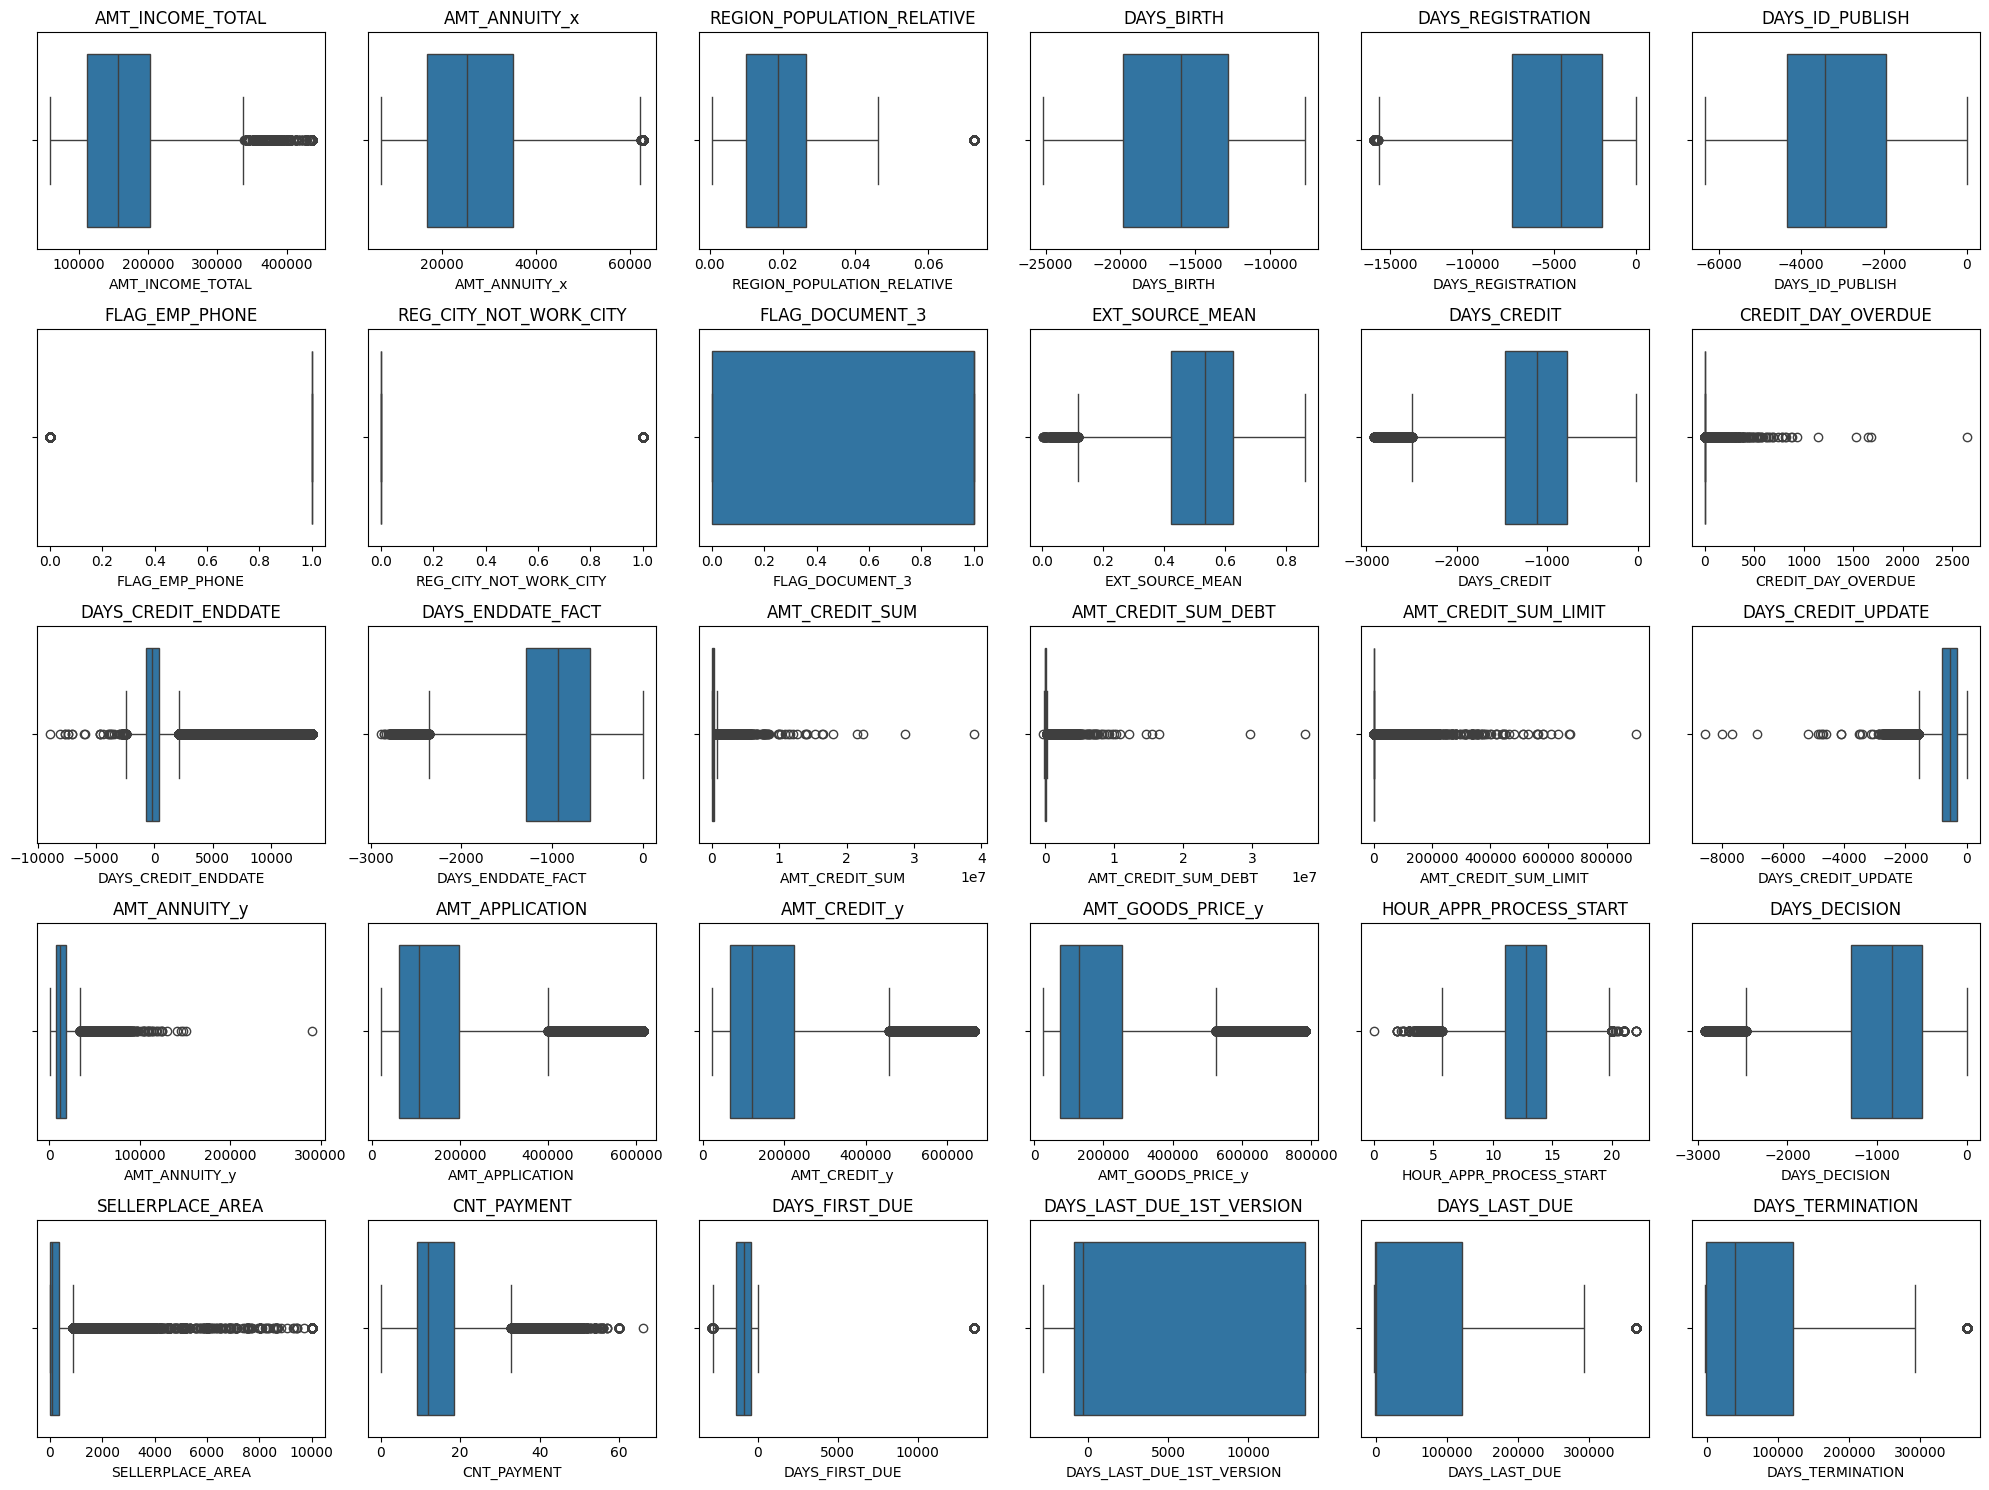

In [86]:
# Configurando o tamanho do gráfico
plt.figure(figsize=(20, 15))

# Criando os subplots
for i, var in enumerate(numericas.columns):
    plt.subplot(5, 6, i + 1)  
    sns.boxplot(x=numericas[var])
    plt.title(var)

# Ajustes de layout
plt.tight_layout()
plt.show()

Conclusão:

- As variaveis após inserção de novas variaveis e registros se mantiveram com o tratamento do dataframe original bureau_train.
- Não precisarei trata-las.

#### Variaveis Originais Categoricas

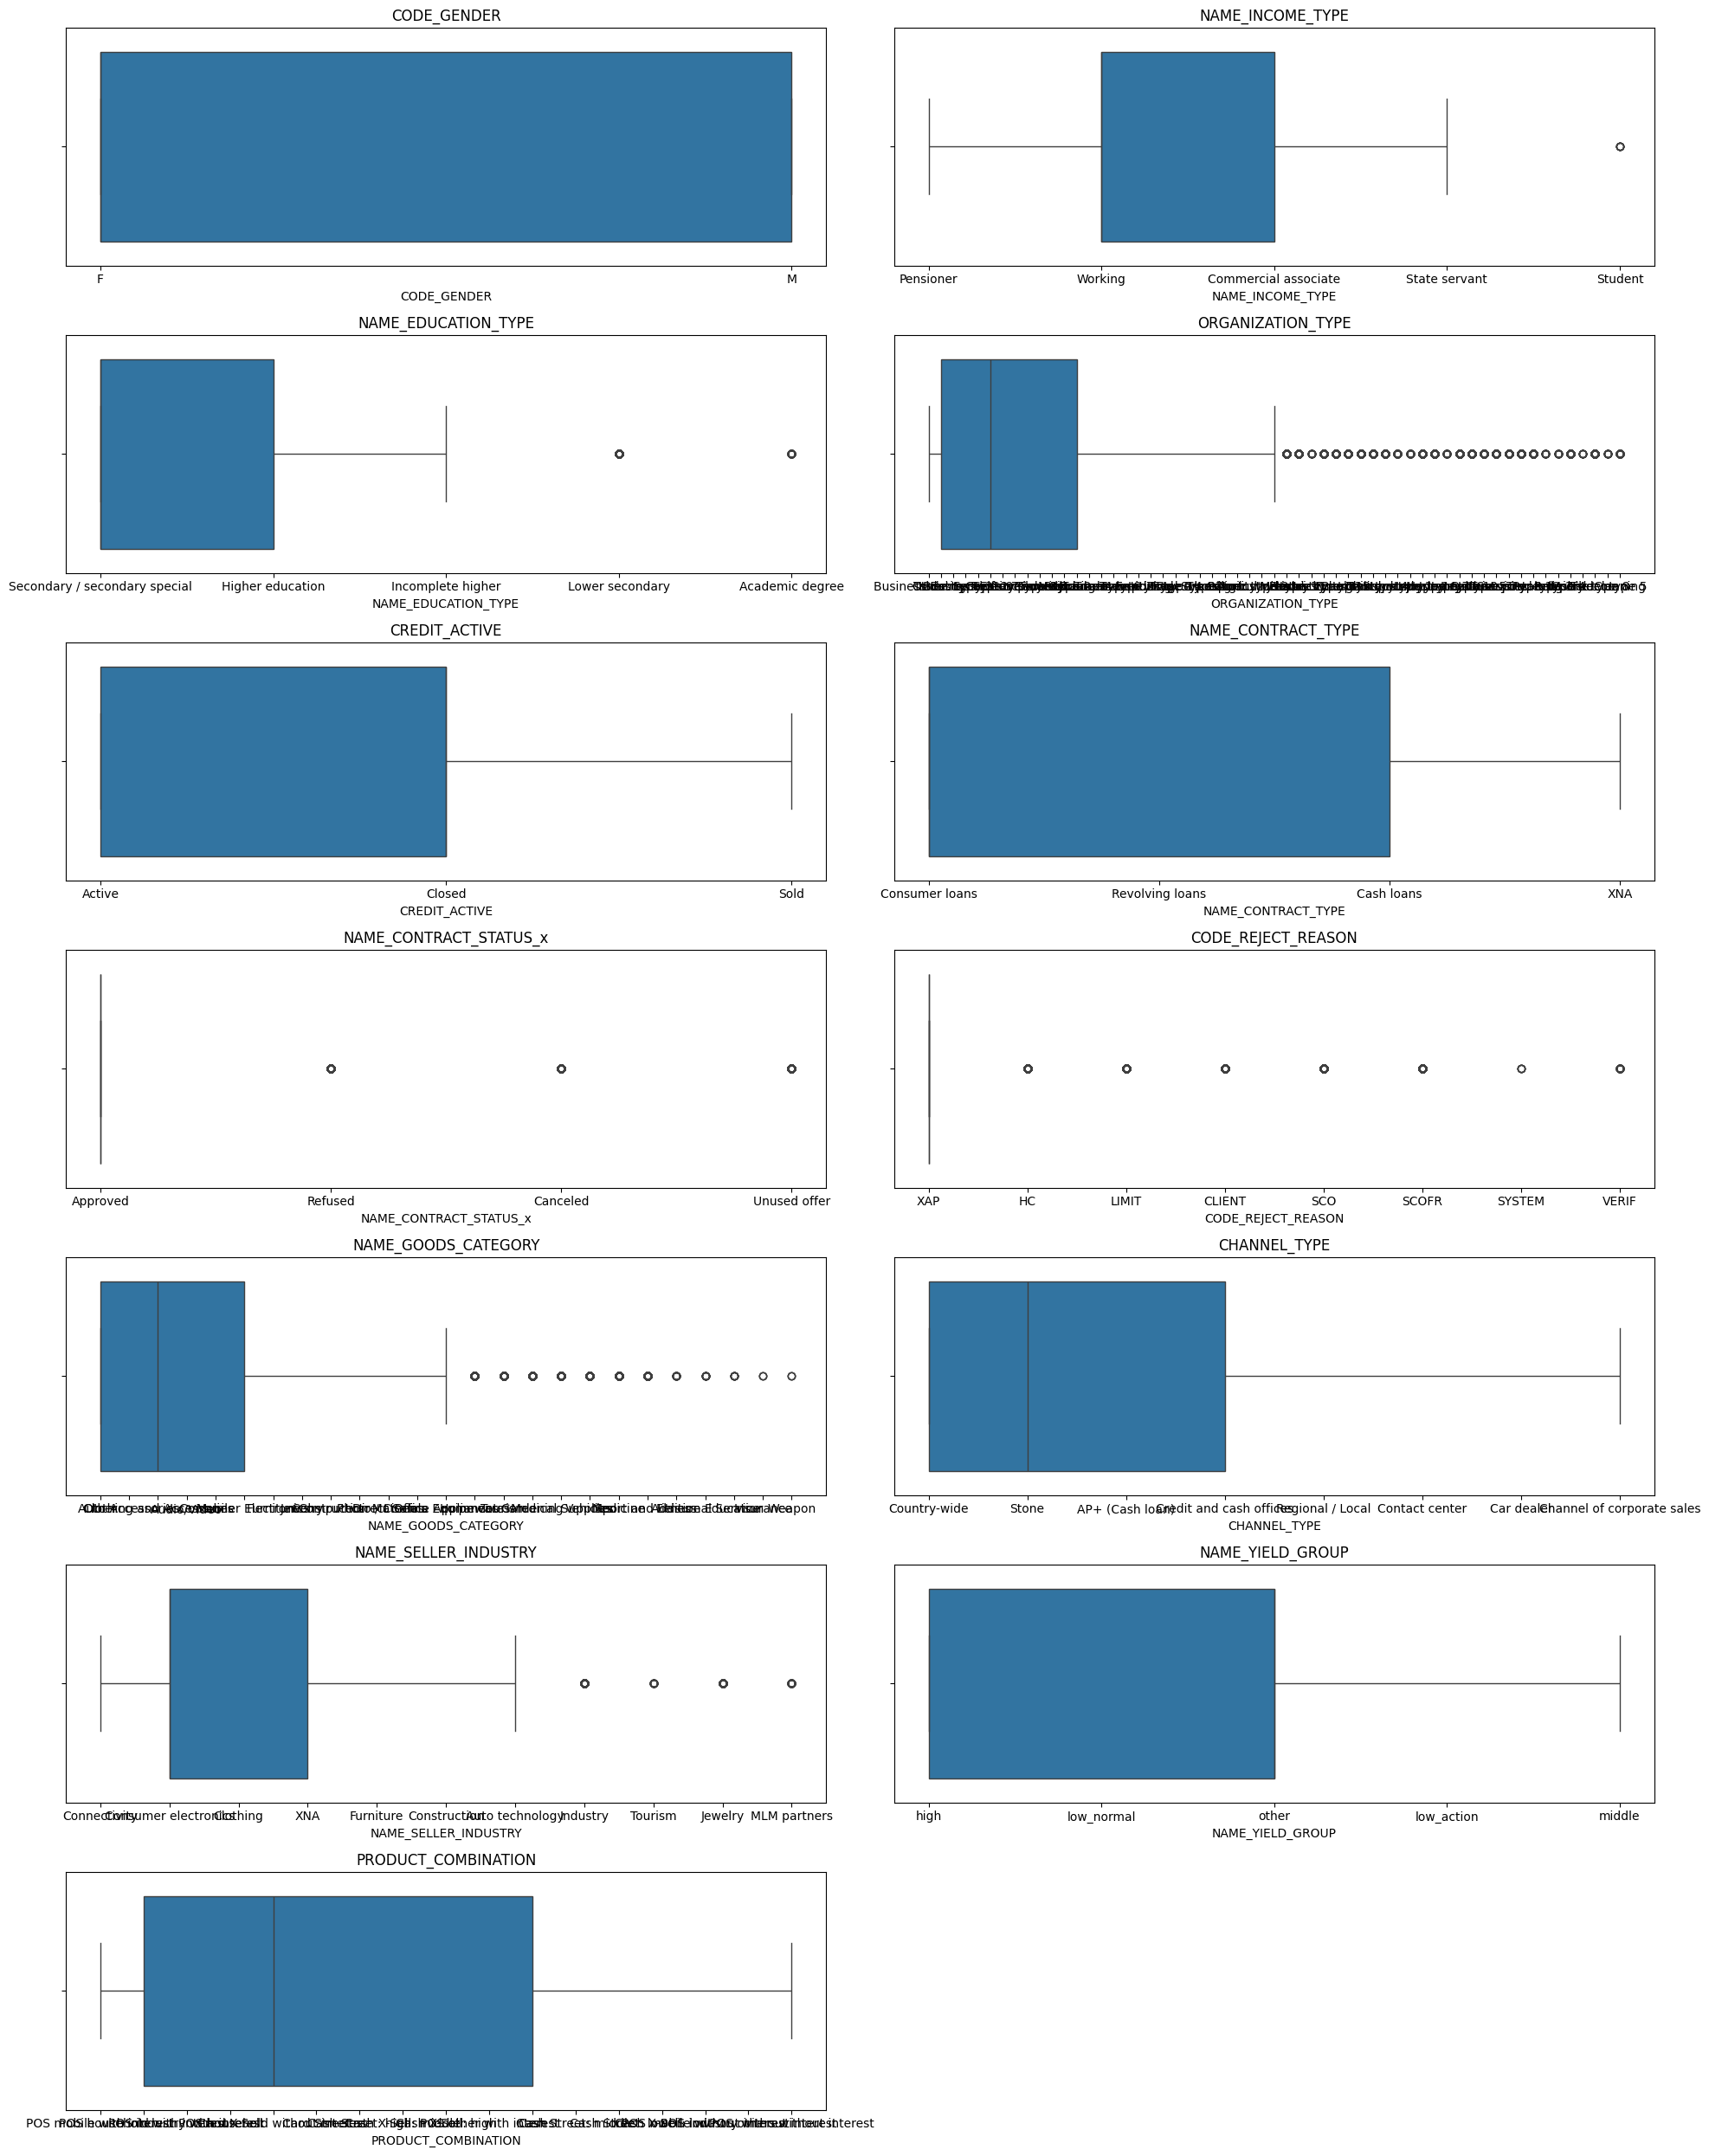

In [87]:
# Configurando o tamanho do gráfico
plt.figure(figsize=(20, 25))

# Criando os subplots
for i, var in enumerate(categoricas.columns):
    plt.subplot(7, 2, i + 1)  
    sns.boxplot(x=categoricas[var])
    plt.title(var)

# Ajustes de layout
plt.tight_layout()
plt.show()

In [89]:
# Dois registros xna
df_pos_train.loc[df_pos_train['NAME_CONTRACT_TYPE'] == 'XNA' , 'NAME_CONTRACT_TYPE'] = 'Consumer loans'
df_pos_test.loc[df_pos_test['NAME_CONTRACT_TYPE'] == 'XNA' , 'NAME_CONTRACT_TYPE'] = 'Consumer loans'

df_pos_train.NAME_CONTRACT_TYPE.value_counts()

NAME_CONTRACT_TYPE
Consumer loans     38948
Cash loans         29726
Revolving loans     1778
Name: count, dtype: int64

In [90]:
df_pos_train.NAME_SELLER_INDUSTRY.value_counts()

NAME_SELLER_INDUSTRY
XNA                     27625
Consumer electronics    19586
Connectivity            16638
Furniture                2197
Clothing                 1674
Construction             1585
Industry                  696
Auto technology           329
Jewelry                    73
MLM partners               31
Tourism                    18
Name: count, dtype: int64

In [91]:
df_pos_train.loc[df_pos_train['NAME_SELLER_INDUSTRY'] == 'XNA' , 'NAME_SELLER_INDUSTRY'] = 'Other'
df_pos_test.loc[df_pos_test['NAME_SELLER_INDUSTRY'] == 'XNA' , 'NAME_SELLER_INDUSTRY'] = 'Other'

df_pos_train.NAME_SELLER_INDUSTRY.value_counts()

NAME_SELLER_INDUSTRY
Other                   27625
Consumer electronics    19586
Connectivity            16638
Furniture                2197
Clothing                 1674
Construction             1585
Industry                  696
Auto technology           329
Jewelry                    73
MLM partners               31
Tourism                    18
Name: count, dtype: int64

### Variaveis Adicionadas

In [92]:
# - MONTHS_BALANCE: Número de meses antes da data atual.
# - CNT_INSTALMENT: Número de parcelas originalmente planejadas para um contrato.
# - CNT_INSTALMENT_FUTURE: Número de parcelas futuras ainda a serem pagas.
# - SK_DPD: Número de dias de atraso no pagamento.
# - SK_DPD_DEF: Número de dias de atraso definitivos no pagamento.

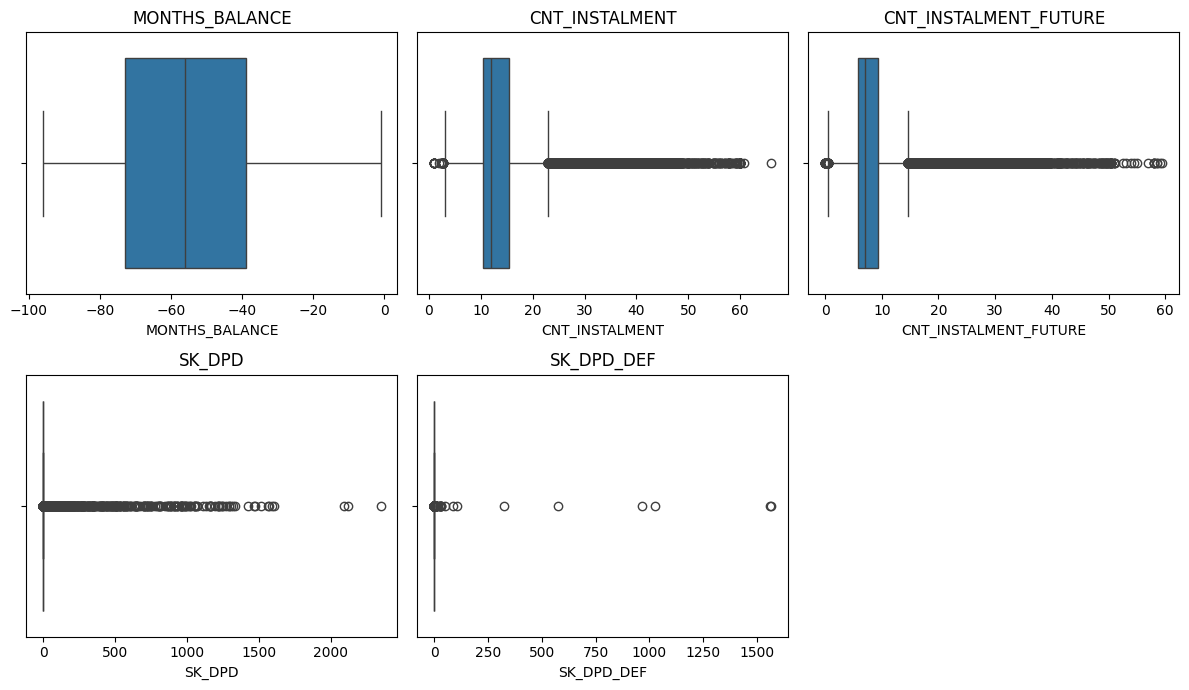

In [93]:
# Lista das variáveis numéricas exceto TARGET, SK_ID_CURR e SK_ID_BUREAU
variaveis_numericas = ['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF']

# Configuração do tamanho do gráfico
plt.figure(figsize=(12, 7))

# Criando os subplots
for i, var in enumerate(variaveis_numericas):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df_pos_train[var])
    plt.title(var)

# Ajustes de layout
plt.tight_layout()
plt.show()

In [94]:
df_pos_train[['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF']].describe()

,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,70452.000000,70452.000000,70452.000000,70452.000000,70452.000000
mean,-55.525762,13.966513,8.649925,2.789313,0.134732
std,24.256606,6.868979,5.644352,45.103514,10.221420
min,-96.000000,1.000000,0.000000,0.000000,0.000000
25%,-73.000000,10.475995,5.808306,0.000000,0.000000
50%,-56.000000,12.000000,7.025000,0.000000,0.000000
75%,-39.000000,15.483871,9.330674,0.000000,0.000000
max,-1.000000,66.064103,59.500000,2346.603774,1567.542373


In [95]:
# Muitos valores zero
# Significa que a maioria dos clientes estão em dia com suas dividas
df_pos_train.SK_DPD.value_counts()

SK_DPD
0.000000     60858
0.333333        90
0.500000        88
1.000000        77
0.250000        75
             ...  
11.133333        1
0.301205         1
78.972222        1
0.162500         1
0.930233         1
Name: count, Length: 3452, dtype: int64

In [96]:
# O mesmo occore com essa variavel
df_pos_train.SK_DPD_DEF.value_counts()

SK_DPD_DEF
0.000000    63514
0.333333       70
0.500000       70
0.250000       64
0.166667       55
            ...  
0.215190        1
3.600000        1
1.826087        1
0.247706        1
1.875000        1
Name: count, Length: 1929, dtype: int64

In [97]:
# Como se trata de parcelas de um empréstimo, pode ter uma amplitude alta nos valores
df_pos_train.CNT_INSTALMENT.value_counts()

CNT_INSTALMENT
12.000000    24619
6.000000      2301
10.000000     1990
24.000000     1108
18.000000      529
             ...  
22.717391        1
20.886364        1
15.114754        1
44.642857        1
37.152174        1
Name: count, Length: 15160, dtype: int64

Conclusão:

- Estou concluindo que os valores extremos nas variáveis analisadas não devem ser excluídos porque representam uma diversidade significativa nos perfis dos clientes. Esses valores extremos não são necessariamente registros errados, mas sim uma representação genuína da realidade dos diferentes perfis dos clientes.

# Análise de Variaveis

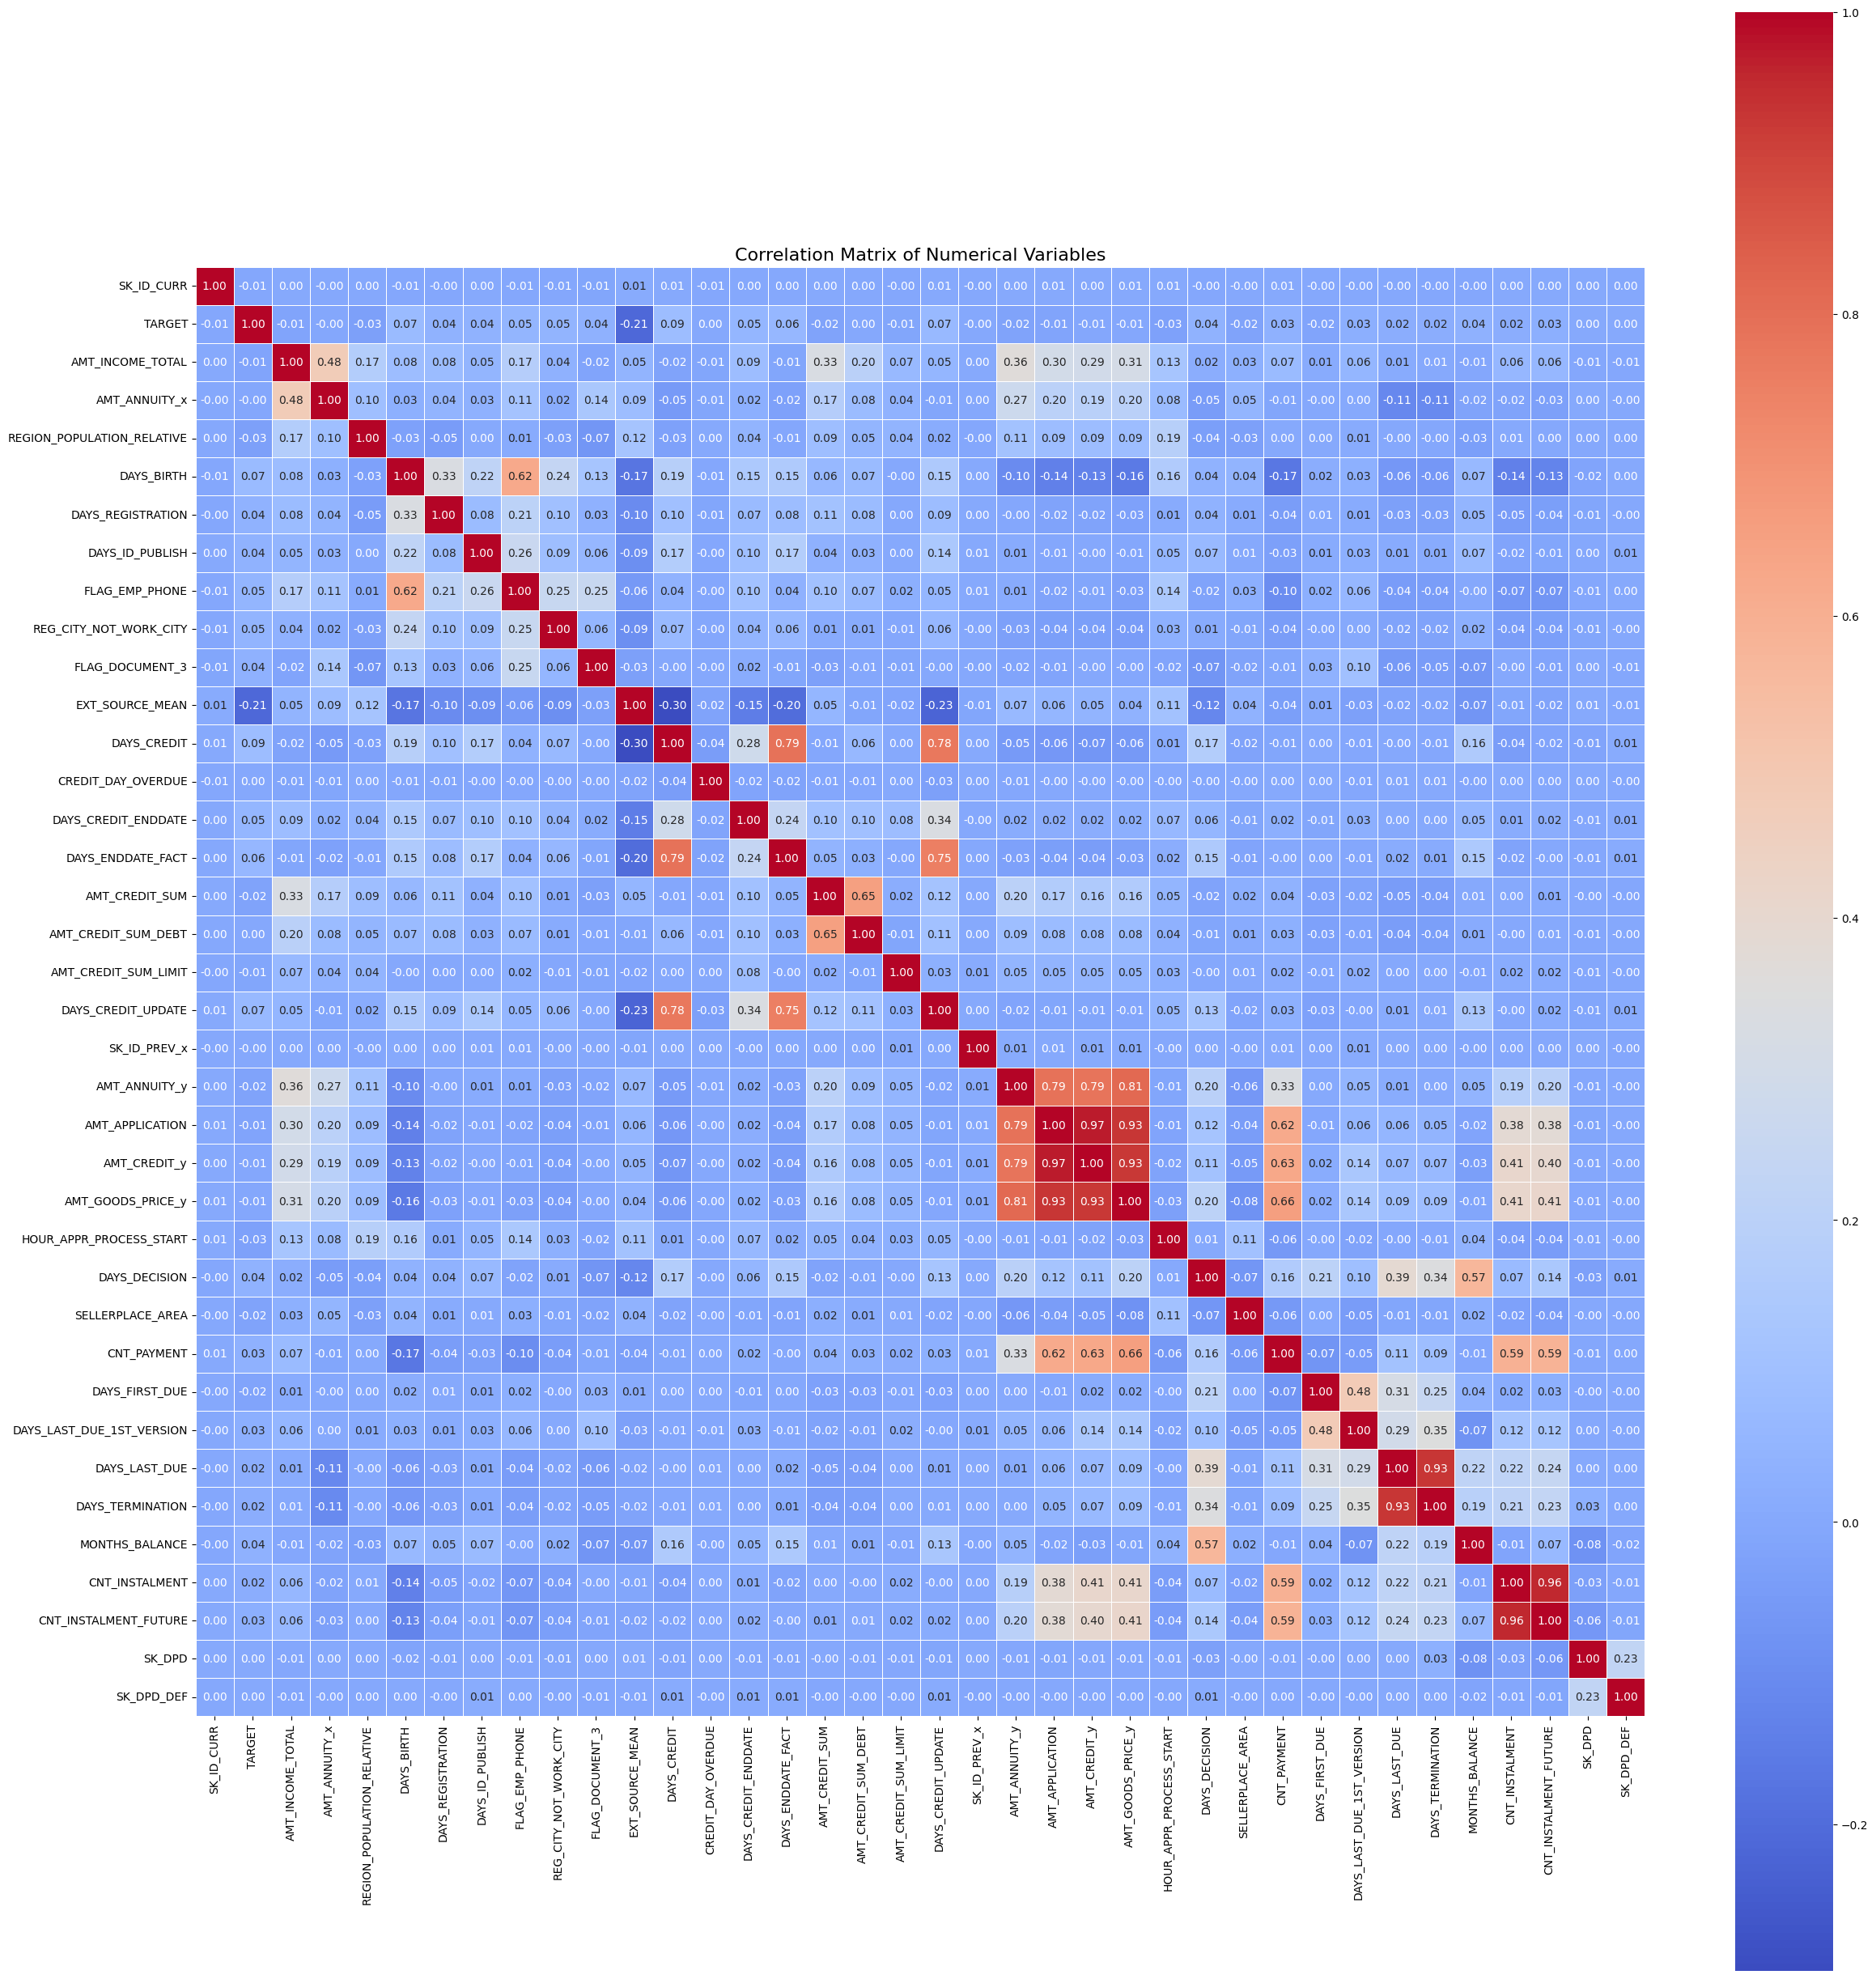

In [98]:
# Selecionar apenas as colunas numéricas
numeric_cols = df_pos_train.select_dtypes(include=['int64', 'float64']).columns

# Calcular a matriz de correlação
correlation_matrix = df_pos_train[numeric_cols].corr()

# Plotar o gráfico de correlação usando seaborn
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.yticks()
plt.xticks()
plt.tight_layout()
plt.show()

In [99]:
df_pos_train.columns

Index(['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'AMT_INCOME_TOTAL',
       'AMT_ANNUITY_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_3', 'EXT_SOURCE_MEAN',
       'CREDIT_ACTIVE', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE',
       'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_SUM',
       'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'DAYS_CREDIT_UPDATE',
       'SK_ID_PREV_x', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY_y',
       'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y',
       'HOUR_APPR_PROCESS_START', 'NAME_CONTRACT_STATUS_x', 'DAYS_DECISION',
       'CODE_REJECT_REASON', 'NAME_GOODS_CATEGORY', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DU

In [100]:
# Selecionar apenas variáveis numéricas
numeric_cols = df_pos_train.select_dtypes(include=['int64', 'float64']).columns

# Calcular VIF para cada variável numérica
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_cols
vif_data["VIF"] = [variance_inflation_factor(df_pos_train[numeric_cols].values, i) for i in range(len(numeric_cols))]

# Ordenar em ordem decrescente de VIF
vif_data = vif_data.sort_values(by='VIF', ascending=False).reset_index(drop=True)

print(vif_data)

                       Feature        VIF
0               CNT_INSTALMENT  71.311745
1              AMT_APPLICATION  64.212792
2                 AMT_CREDIT_y  59.660189
3        CNT_INSTALMENT_FUTURE  46.371590
4            AMT_GOODS_PRICE_y  29.013987
5                  DAYS_CREDIT  22.557853
6                   DAYS_BIRTH  22.334941
7      HOUR_APPR_PROCESS_START  21.021040
8              EXT_SOURCE_MEAN  16.666408
9             DAYS_TERMINATION  14.240878
10           DAYS_ENDDATE_FACT  14.132159
11               DAYS_LAST_DUE  14.036690
12               AMT_ANNUITY_y  13.507987
13                 CNT_PAYMENT  12.597626
14                SK_ID_PREV_x  12.350114
15              MONTHS_BALANCE  10.343489
16          DAYS_CREDIT_UPDATE  10.100651
17            AMT_INCOME_TOTAL   8.486933
18              FLAG_EMP_PHONE   8.421600
19                  SK_ID_CURR   7.804398
20               DAYS_DECISION   7.780369
21               AMT_ANNUITY_x   7.320686
22             DAYS_ID_PUBLISH   5

In [101]:
inadimplentes = df_pos_train[df_pos_train['TARGET'] == 1]
nao_inadimplentes = df_pos_train[df_pos_train['TARGET'] == 0]


def calcular_iv(inadimplentes, nao_inadimplentes, variavel):
    # Calculando a taxa de inadimplência e não inadimplência
    bad_rate = inadimplentes.groupby(variavel).size() / len(inadimplentes)
    good_rate = nao_inadimplentes.groupby(variavel).size() / len(nao_inadimplentes)
    
    # Calculando o WOE (Weight of Evidence)
    woe = np.log(good_rate / bad_rate)
    
    # Calculando o IV (Information Value)
    iv = np.sum((good_rate - bad_rate) * woe)
    
    return iv

# Dicionário para armazenar os IVs
iv_variaveis = {}

# Iteração sobre as colunas dos dataframes (supondo que são os mesmos para inadimplentes e não inadimplentes)
for coluna in inadimplentes.columns:
    if coluna != 'TARGET':
        iv = calcular_iv(inadimplentes, nao_inadimplentes, coluna)
        iv_variaveis[coluna] = iv

# Ordenando as variáveis por IV decrescente
iv_variaveis_ordenado = sorted(iv_variaveis.items(), key=lambda x: x[1], reverse=True)

print(f'Variaveis menos importantes com base no IV:')

# Filtrando e exibindo apenas variáveis com IV < 0.02
for variavel, valor_iv in iv_variaveis_ordenado:
    if valor_iv < 0.02:
        print(f'{variavel}: {valor_iv}')

Variaveis menos importantes com base no IV:
EXT_SOURCE_MEAN: 0.011177267540949495
NAME_CONTRACT_STATUS_y: 0.0025229137866320315
SK_ID_CURR: 0.0
SK_ID_PREV_x: 0.0


In [102]:
df_pos_train = df_pos_train.drop(['NAME_CONTRACT_STATUS_y', 'CNT_INSTALMENT', 'AMT_APPLICATION', 
                                  'CNT_INSTALMENT_FUTURE'], axis=1)
df_pos_test = df_pos_test.drop(['NAME_CONTRACT_STATUS_y', 'CNT_INSTALMENT', 'AMT_APPLICATION', 
                                'CNT_INSTALMENT_FUTURE'], axis=1)

df_pos_train.shape, df_pos_test.shape

((70452, 48), (30160, 48))

In [103]:
# Vou alterar o nome da coluna ID
df_pos_train = df_pos_train.rename(columns={'SK_ID_PREV_x': 'SK_ID_PREV'})
df_pos_test = df_pos_test.rename(columns={'SK_ID_PREV_x': 'SK_ID_PREV'})

In [104]:
# Vamos salvar o dataframes bureau_train e bureau_test
df_pos_train.to_csv('pos_train.csv', index=False)
df_pos_test.to_csv('pos_test.csv', index=False)